Daten Augmentation
 ======
 
 Einleitung
------
 
Dieses Notebook ist dafür da, um die Bibliothek Keras ImageDataGenerator auszuprobieren.   
Durch die Klasse ImageDataGenerator können zusätzliche Bilder erzeugt werden. Damit kann für ein neuronales Netz  
die Anzahl der verfügbaren Trainingsdaten erweitert werden. Dies reduziert Overfittung (Überanpassung) eines Netzes   
und steigert die Generalisierung bei der Klassifizierung von unbekannten Bildern. Die Bilder können erzeugt  
werden durch Transformation der vorhandenen Bilder. Zu den Transformationen    
gehören z.B. Rotation, Skalierung der Pixelwerte und zoomen.

Versuchsaufbau
------
 
Für den Datensatz 22 werden mit Daten Argumentation weitere Bilder erzeugt. Dabei ist interessant welche Art von Transformationen für die Bilder sinnvoll sind. Im nächsten Schritt soll ein Stapel von Bildern augmentiert werden.
 
 Ergebnis 
 ------

In den weiter unten zu sehenden augmentierten Bildern (Abb. 1-13) kann der Unterschied betrachtet werden mit unterschiedlichen Argumenten für den Aufruf der Klasse ImageDataGenerator.

Die Transformierung mit geometrischer Scherung bzw. mit dem Argument „shear_range“  der Klasse ImageDataGenerator führt eine zufällige Scherung durch innerhalb des angegebenen Wertebereichs in Grad. Wie zu sehen ist mit einer Scherung von 2.0 Grad (Abb. 1) kaum ein Unterschied zu dem Originalbild erkennbar.  Allerdings bei 20.0 Grad (Abb. 2) ist schon gut eine andere Abbildung des Originalbildes zu erkennen nach der Transformation. Auf Abbildung 3 mit 200.0 Grad als Wert ist eine starke Verzerrung zu sehen.

Eine Vermehrung der Bilder mit einer Rotation von 2.0 Grad (Abb. 4) bringt kaum eine veränderung des Zielbildes zum Quellbild. Bei 20.0 Grad (Abb. 5) müssen Bildwerte aufgefüllt werden mit einer Füllmethode. Schließlich sind bei einer möglichen Rotation von 200.0 Grad (Abb. 6) die entstandenen Bilder stark verzerrt.
 
Auch mit der „height_shift_range“ Transformation also zufällige vertikale Verschiebung sind ähnliche Ergebnisse zu sehen bei einer höheren Grad Angabe des Parameters (Abb. 7-10). Es müssen also mehr Bildwerte aufgefüllt werden.

Auf der Abbildung 12 ist zu sehen wie mehrere Tranformationen ausgeführt wurden. Dabei beträgt die Grad Anzahl 1.0 bei allen Argumenten für die Klasse ImageDataGenerator, welche einen zufälligen Wertebereich benötigen. Das Ergebnis für einen zufälligen Wertebereich von 0.1 Grad ist auf Abb. 13 zu sehen.  

 
Fazit
------
Bei Transformationen wie Rotation, Scherung und vertikale Verschiebung sollte der Grad der Transformierung zwischen ca. 0.1 – 0.5 Grad liegen. Hierbei ist zu beachten, dass bei einer starken Transformierung fehlende Bildwerte mit einer Füllmethode aufgefüllt werden. Es ist besser mehrere Transformationen, wenn möglich mit kleinen Parametern anzuwenden. Hierzu vergleiche Abb. 12 mit 13. Auf Abbildung 13 mit dem zufälligen Wertebereich von 0.1 Grad werden weniger Bildwerte aufgefüllt. Dies ermöglicht ähnliche unterschiedliche Bilder zu generieren mit geringen Störungen.

In [6]:
# Lade Bibliothek Keras ImageDataGenerator und weitere
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2
import matplotlib.pyplot as plt
import os
from mpl_toolkits.axes_grid1 import ImageGrid

Klasse ImageDataGenerator   
Argumente:   
* fill_mode, Bei einer zufälligen Transformation können für eine Eingangswerte außerhalb des Bildbereich des Bildes sein. Hier wird angegeben wie Farbwerte aufgefüllt werden. Möglich sind die Operationen 'nearest', 'constant', 'reflect' und 'wrap'     
* rotation_range, Wertebereich zufälliger Rotierungen in Grad
* width_shift_range, height_shift_range, Wertebereich für zufällige vertikale oder horizontale Verschiebung  
* shear_range, zufällige geometrische Scherung 
* zoom_range, zufälliger Zoom Wertebereich
* horizontal_flip, Bild wird zufällig horizontal gespiegelt
* viele weitere siehe https://keras.io/preprocessing/image/  

In [97]:
datagen = ImageDataGenerator(
        width_shift_range=200,
        fill_mode='nearest')

In [75]:
# Daten Argumenation aus einem Bild
img = cv2.imread('../../daten/datensatz/22/zugeschnitten/1/1523020665024.jpg')
x = img_to_array(img) 
x = x.reshape((1,) + x.shape) #shape (1, 3, h, w)
print(x.shape)

(1, 362, 70, 3)


Text(0.5,1,'Eingangsbild')

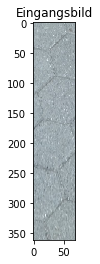

In [76]:
# Bild ausgeben 
plt.imshow(img, cmap='gray')
plt.title('Eingangsbild')

Die Methode flow() generiert einen Stapel von Bildern, welche abgespeichert werden.  
Argumente:
* x, Bilder im Numpy Format (Rang 4 mit Angabe der Farbkanäle)   
* batch_size, TODO   
* save_to_dir, Pfad in dem die Bilder geschrieben werden  
* save_format, Bildformat beim abspeichern

In [150]:
i = 0 
samples = 10 # Anzahl der Bilder
for batch in datagen.flow(x, batch_size=1, save_to_dir='beispielDataAugmentation_mehrereTransformationen0_1', save_format='jpg'):
    i += 1
    if i >= samples: 
        break

In [185]:
# Lade alle Bider des angegebenen Ordners in eine Liste
image_path = 'C:/Users/morro/Documents/fahrradwegeKlassifizierung/bildverarbeitung/beispielDataAugmentation_shearRange2/' 
dirs = os.listdir(image_path)
images=[]
for file in dirs:
    if "jpg" not in file:   
        continue
    images.append(cv2.imread(image_path + '/'+ file))

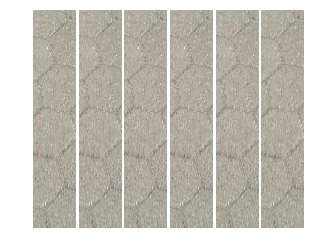

Abbildung 1: Daten Augmentation mit shear_range gleich 2 Grad Wertebereich


In [186]:
# ImageDataGenerator mit shear_range=2 und fill_mode='nearest' 
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 1: Daten Augmentation mit shear_range gleich 2 Grad Wertebereich')

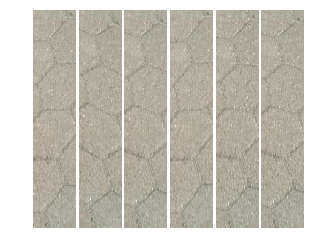

Abbildung 2: Daten Augmentation mit shear_range gleich 20 Grad Wertebereich


In [184]:
# ImageDataGenerator mit shear_range=20 und fill_mode='nearest' 
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 2: Daten Augmentation mit shear_range gleich 20 Grad Wertebereich')

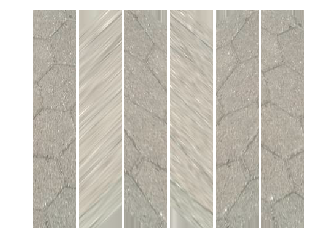

Abbildung 3: Daten Augmentation mit shear_range gleich 200 Grad Wertebereich


In [182]:
# ImageDataGenerator mit shear_range=200 und fill_mode='nearest' 
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 3: Daten Augmentation mit shear_range gleich 200 Grad Wertebereich')

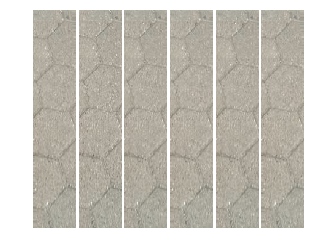

Abbildung 4: Daten Augmentation mit rotation_range gleich 2 Grad Wertebereich


In [180]:
# ImageDataGenerator mit rotation_range=2 und fill_mode='nearest' 
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 4: Daten Augmentation mit rotation_range gleich 2 Grad Wertebereich')

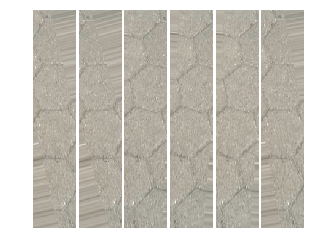

Abbildung 5: Daten Augmentation mit rotation_range gleich 20 Grad Wertebereich


In [178]:
# ImageDataGenerator mit rotation_range=20 und fill_mode='nearest' 
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 5: Daten Augmentation mit rotation_range gleich 20 Grad Wertebereich')

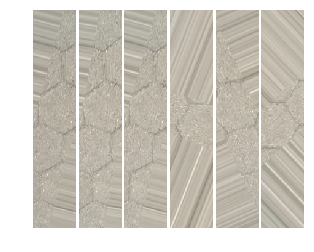

Abbildung 6: Daten Augmentation mit rotation_range gleich 200 Grad Wertebereich


In [176]:
# ImageDataGenerator mit rotation_range=200 und fill_mode='nearest' 
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 6: Daten Augmentation mit rotation_range gleich 200 Grad Wertebereich')

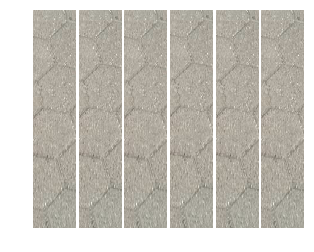

Abbildung 7: Daten Augmentation mit height_shift_range gleich 2 Grad Wertebereich


In [174]:
# ImageDataGenerator mit height_shift_range=2 und fill_mode='nearest' 
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 7: Daten Augmentation mit height_shift_range gleich 2 Grad Wertebereich')

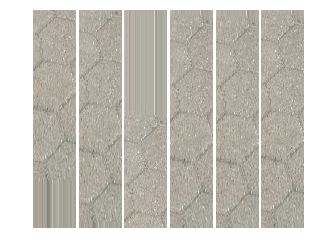

Abbildung 8: Daten Augmentation mit height_shift_range gleich 20 Grad Wertebereich


In [172]:
# ImageDataGenerator mit height_shift_range=20 und fill_mode='nearest' 
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 8: Daten Augmentation mit height_shift_range gleich 20 Grad Wertebereich')

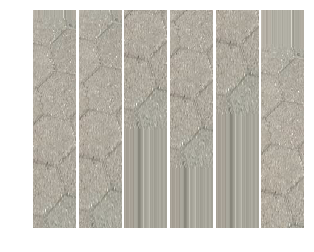

Abbildung 9: Daten Augmentation mit height_shift_range gleich 200 Grad Wertebereich


In [168]:
# ImageDataGenerator mit height_shift_range=200 und fill_mode='nearest' 
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 9: Daten Augmentation mit height_shift_range gleich 200 Grad Wertebereich')

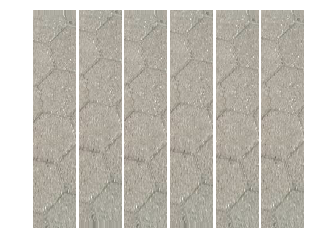

Abbildung 10: Daten Augmentation mit height_shift_range gleich 10 Grad Wertebereich


In [170]:
# ImageDataGenerator mit height_shift_range=10 und fill_mode='nearest' 
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 10: Daten Augmentation mit height_shift_range gleich 10 Grad Wertebereich')

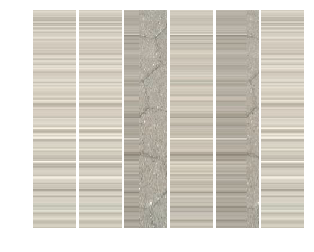

Abbildung 11: Daten Augmentation mit width_shift_range gleich 200 Grad Wertebereich


In [165]:
# ImageDataGenerator mit width_shift_range=200 und fill_mode='nearest' 
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 11: Daten Augmentation mit width_shift_range gleich 200 Grad Wertebereich')

In [127]:
datagen = ImageDataGenerator(
        width_shift_range=1.0,
        height_shift_range=1.0,
        rotation_range=1.0,
        shear_range=1.0,
        zoom_range=1.0,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

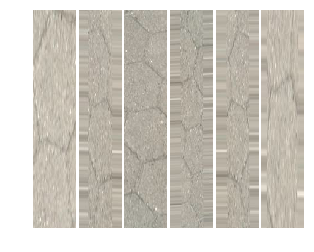

Abbildung 12: Daten Augmentation mit mehreren Transformationen sowie 1.0 Grad Wertebereich


In [163]:
# ImageDataGenerator mit den Paramtern der obigen Zelle
fig = plt.figure(1)
grid = ImageGrid(fig, 111, nrows_ncols=(1, 6), axes_pad=0.05)
imageToShow = 6
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 12: Daten Augmentation mit mehreren Transformationen sowie 1.0 Grad Wertebereich')

In [149]:
datagen = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        rotation_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        vertical_flip=True,
        horizontal_flip=True,
        fill_mode='nearest')

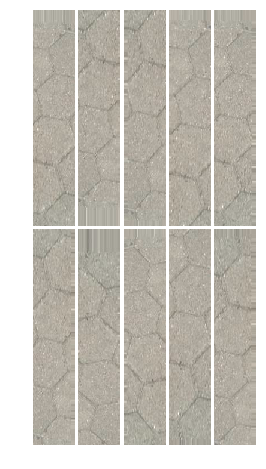

Abbildung 13: Daten Augmentation mit mehreren Transformationen sowie 0.1 Grad Wertebereich


In [161]:
# ImageDataGenerator mit den Paramtern der obigen Zelle
fig = plt.figure(1,figsize=(8,8))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.05)
imageToShow = 10
for i, img in enumerate(images[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()
print('Abbildung 13: Daten Augmentation mit mehreren Transformationen sowie 0.1 Grad Wertebereich')

In [195]:
# Zum Laden von Bildern eines Datensatzes
path = os.getcwd()
imagePathName = 'C:/Users/morro/Documents/datenRoh/22/2018_3_6_15_15/unbefestigt/zugeschnitten'
files = os.listdir(imagePathName)
# Erstellt Ordner um Bilder abzuspeichern
outputDir = "C:/Users/morro/Documents/datenRoh/22/2018_3_6_15_15/unbefestigt/augmentation"
if not os.path.exists(outputDir):
  os.makedirs(outputDir)

In [200]:
imagesList = []
for file in files:
    if "jpg" not in file:
        continue
    imagesList.append(cv2.imread(imagePathName + "/"+  file))

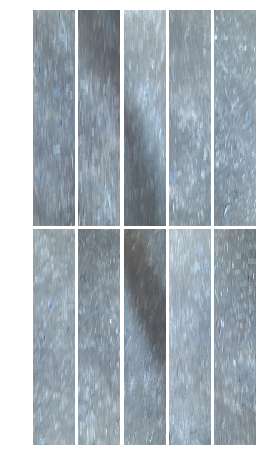

In [213]:
fig = plt.figure(1,figsize=(8,8))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.05)
imageToShow = 10
for i, img in enumerate(imagesList[0: imageToShow]):
    ax = grid[i]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
plt.show()

In [203]:
imagesList

[array([[[135, 142, 145],
         [134, 141, 144],
         [150, 159, 163],
         ...,
         [127, 138, 146],
         [119, 130, 138],
         [122, 132, 139]],
 
        [[137, 144, 147],
         [135, 142, 145],
         [147, 156, 160],
         ...,
         [135, 146, 154],
         [126, 137, 145],
         [119, 129, 136]],
 
        [[137, 144, 147],
         [137, 143, 148],
         [146, 155, 159],
         ...,
         [143, 154, 162],
         [133, 144, 152],
         [119, 129, 136]],
 
        ...,
 
        [[124, 140, 147],
         [119, 135, 142],
         [125, 141, 148],
         ...,
         [109, 117, 124],
         [118, 126, 133],
         [117, 125, 132]],
 
        [[122, 138, 145],
         [117, 133, 140],
         [120, 136, 143],
         ...,
         [118, 126, 133],
         [119, 127, 134],
         [120, 128, 135]],
 
        [[120, 136, 143],
         [116, 132, 139],
         [118, 134, 141],
         ...,
         [118, 126, 133],
  